In [43]:
import pandas as pd
import numpy as np
import random as rnd

import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [44]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [63]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577547

In [64]:
matrix = df.corr()
print(matrix)

               Age  Embarked      Fare     Parch    Pclass       Sex  \
Age       1.000000  0.048993  0.178740 -0.150917 -0.408106  0.063645   
Embarked  0.048993  1.000000  0.062017 -0.095975  0.037527 -0.121868   
Fare      0.178740  0.062017  1.000000  0.221539 -0.558629 -0.185523   
Parch    -0.150917 -0.095975  0.221539  1.000000  0.018322 -0.213125   
Pclass   -0.408106  0.037527 -0.558629  0.018322  1.000000  0.124617   
Sex       0.063645 -0.121868 -0.185523 -0.213125  0.124617  1.000000   
SibSp    -0.243699 -0.073937  0.160238  0.373587  0.060832 -0.109609   
Survived -0.077221  0.108669  0.257307  0.081629 -0.338481 -0.543351   
train    -0.018528 -0.072726 -0.030831 -0.005793  0.023988  0.010928   

             SibSp  Survived     train  
Age      -0.243699 -0.077221 -0.018528  
Embarked -0.073937  0.108669 -0.072726  
Fare      0.160238  0.257307 -0.030831  
Parch     0.373587  0.081629 -0.005793  
Pclass    0.060832 -0.338481  0.023988  
Sex      -0.109609 -0.543351  0.0

In [48]:
df.corr().style.background_gradient(cmap="Greens")

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
Age,1.000000,0.048993,0.178740,-0.150917,-0.408106,0.063645,-0.243699,-0.077221,-0.018528
Embarked,0.048993,1.000000,0.062017,-0.095975,0.037527,-0.121868,-0.073937,0.108669,-0.072726
Fare,0.178740,0.062017,1.000000,0.221539,-0.558629,-0.185523,0.160238,0.257307,-0.030831
Parch,-0.150917,-0.095975,0.221539,1.000000,0.018322,-0.213125,0.373587,0.081629,-0.005793
Pclass,-0.408106,0.037527,-0.558629,0.018322,1.000000,0.124617,0.060832,-0.338481,0.023988
Sex,0.063645,-0.121868,-0.185523,-0.213125,0.124617,1.000000,-0.109609,-0.543351,0.010928
SibSp,-0.243699,-0.073937,0.160238,0.373587,0.060832,-0.109609,1.000000,-0.035322,0.033867
Survived,-0.077221,0.108669,0.257307,0.081629,-0.338481,-0.543351,-0.035322,1.000000,nan
train,-0.018528,-0.072726,-0.030831,-0.005793,0.023988,0.010928,0.033867,nan,1.000000


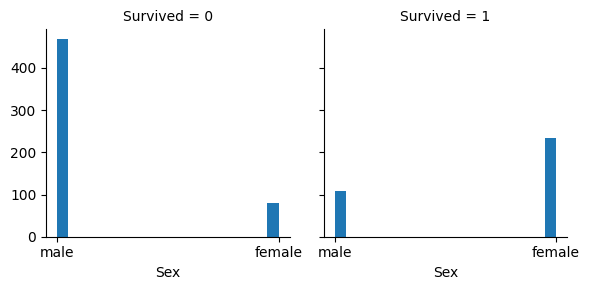

In [57]:
#2.. two visualizations to describe or show correlations
l = sns.FacetGrid(train_df, col='Survived')
l.map(plt.hist, 'Sex', bins=20)

In [65]:
!pip install -upgrade gensim


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [70]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

In [52]:
train_df.corr().style.background_gradient(cmap="Greens")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


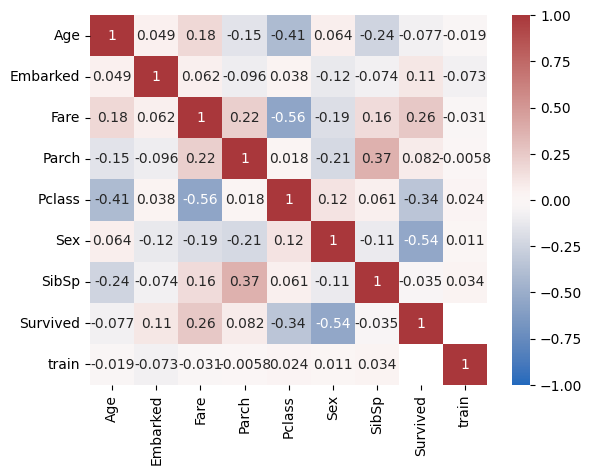

In [53]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [55]:
#3.. Implementing Naïve Bayes method using scikit-learn library and report the accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [56]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)


features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [41]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=0)

In [42]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        82
         1.0       0.75      0.66      0.70        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

[[69 13]
 [21 40]]
accuracy is 0.7622377622377622


In [16]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


In [ ]:
question 2

In [17]:
glass=pd.read_csv("glass.csv")

In [18]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


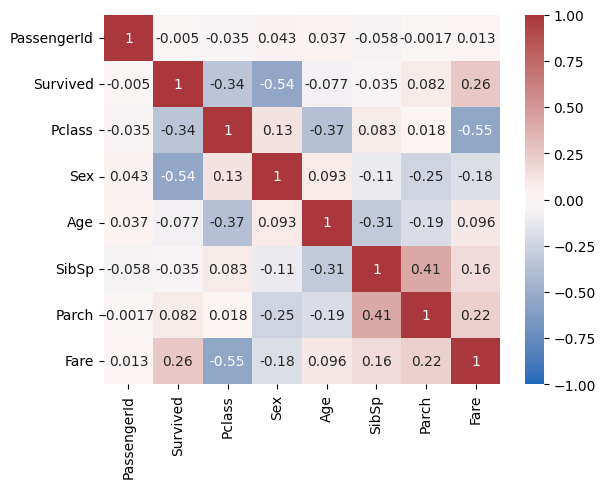

In [20]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [21]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [59]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        85
         1.0       0.40      0.98      0.57        58

    accuracy                           0.40       143
   macro avg       0.20      0.49      0.29       143
weighted avg       0.16      0.40      0.23       143

[[ 0 85]
 [ 1 57]]
accuracy is 0.3986013986013986


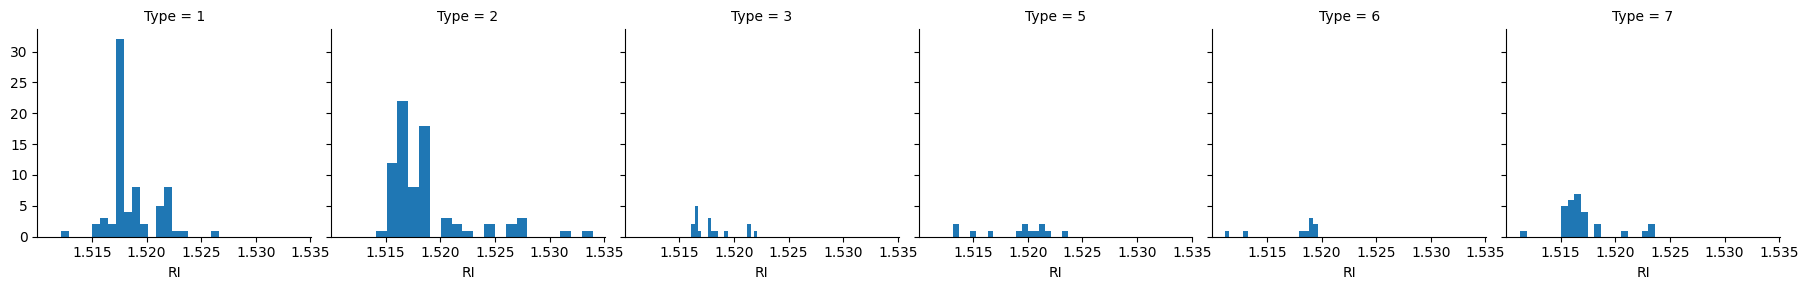

In [25]:
#Do at least two visualizations to describe or show correlations in the Glass Dataset
g = sns.FacetGrid(glass, col='Type')
g.map(plt.hist,'RI',bins=20)

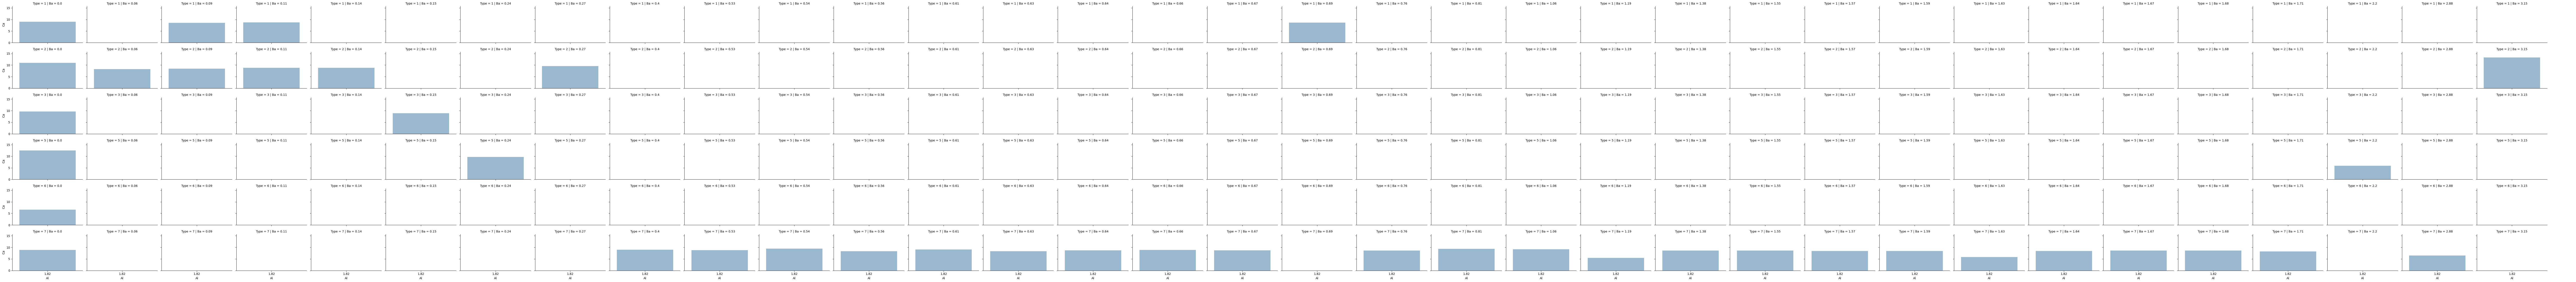

In [26]:
grid = sns.FacetGrid(glass, row='Type',col='Ba',height=2.2,aspect=1.6)
grid.map(sns.barplot,'Al','Ca',alpha=.5,ci=None)
grid.add_legend()

In [ ]:
#Which algorithm you got better accuracy? Can you justify why?
The Gaussian Naive Bayes algorithm is  better accuracy than other algorithms because  this is used when features are not discrete.